## Лаб.11

### Применение рекуррентных сетей для обработки естественного языка

---

#### Задание:
Познакомиться с приемами применения рекуррентных сетей для решения задачи определения тональности текста. Исходные данные – набор отзывов `Yelp`. Документация набора данных [здесь](https://www.yelp.com/dataset).

Отличие от задания лабораторной работы 10: вместо одномерных `CNN` используются `RNN` (архитектуры `LSTM` и `GRU`).

**Порядок выполнения работы:**
1. Повторите действия из пп. 1 – 8 лабораторной работы 10 (импорт и подготовка обучающего набора отзывов).
2. Создайте модель `Sequential` и добавьте следующие слои:
  * `Embedding(num_words, 64, input_length=max_len)`
  * `LSTM(64)`
  * `Dense(1, activation='sigmoid')`
3. Скомпилируйте ИНС, задав алгоритм обучения `adam`, функцию потерь `binary_crossentropy` и метрику качества `accuracy`. Выведите информацию об архитектуре и количестве параметров созданной ИНС.
4. Обучите ИНС, определив 5 эпох обучения, `batch_size=128`, `validation_split=0.1`, сохранив историю процесса обучения.
5. Постройте график изменения метрики `accuracy` на обучающем и проверочном наборах. 
6. Оцените качество обученной модели на тестовом наборе данных:
  * импортируйте содержимое файла `test.csv` в DataFrame;
  * получите числовые представления отзывов тестового набора, применив к обученному на обучающем наборе токенизатору метод `texts_to_sequences()`;
  * приведите числовые представления всех отзывов к одной длине с помощью функции `pad_sequences()`;
  * сформируйте набор меток классов `y_test`;
  * выполните оценку качества обученной модели на подготовленных тестовых данных.
7. Примените обученную модель для оценки тональности произвольного текста.
8. Поэкспериментируйте с гиперпараметрами моделей для получения наилучших результатов. Можно менять
  * длину векторного представления в слое `Embedding`;
  * количество нейронов на рекуррентном слое;
  * количество рекуррентных слоев;
  * тип оптимизатора;
  * параметр `batch_size`;
  * количество эпох обучения.
9. Повторите действия из пп. 2 – 8 для `RNN` с архитектурой `GRU` (заменить слой `LSTM` на слой `GRU`).
10. Сопоставьте результаты, полученные в решении задачи определения тональности отзывов с помощью ИНС различных архитектур: одномерных `CNN`, `LSTM` и `GRU`. Сравните также время, которое понадобилось для обучения ИНС разных архитектур.

---

1. Повторите действия из пп. 1 – 8 лабораторной работы 10 (импорт и подготовка обучающего набора отзывов).

In [ ]:
# download the archive with reviews using the !wget command

!wget https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0

--2022-12-14 12:50:55--  https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fjexugghuawc9rw/yelp_review_polarity_csv.tgz [following]
--2022-12-14 12:50:55--  https://www.dropbox.com/s/raw/fjexugghuawc9rw/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8566660190a5a61eec1ba0a96.dl.dropboxusercontent.com/cd/0/inline/Bynu_w_yMWfyoQBcS-TwBOMWr7r1W94xjL0qm8Xobr9V0n2VRsN-lcvVFNiRkro6O_Xq8kd_5RCdaALQnZcmj43hp92ebJK0y3bQ6kihkjW4eeKZE4g0Ce5AsWu9Vm_E7aeF6ulVAEbuQQkGJoukwuiy-DcYHU8_Y99fsGSCfqW_ww/file# [following]
--2022-12-14 12:50:55--  https://ucf8566660190a5a61eec1ba0a96.dl.dropboxusercontent.com/cd/0/inline/Bynu_w_yMWfyoQBcS-TwBOMWr7r

In [ ]:
!mv yelp_review_polarity_csv.tgz?dl=0 yelp_review_polarity_csv.tgz

In [ ]:
# unzip the archive with the command !tar

!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [ ]:
# output and examine the contents of the received files

# display the contents of the file in full - the !cat command (for the readme.txt file)
!cat yelp_review_polarity_csv/readme.txt

Yelp Review Polarity Dataset

Version 1, Updated 09/09/2015

ORIGIN

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data. For more information, please refer to http://www.yelp.com/dataset_challenge

The Yelp reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


DESCRIPTION

The Yelp reviews polarity dataset is constructed by considering stars 1 and 2 negative, and 3 and 4 positive. For each polarity 280,000 training samples and 19,000 testing samples are take randomly. In total there are 560,000 trainig samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

The files train.csv and test.csv contain all the

In [ ]:
# output first 10 lines (with default setting) - !head command (for train.csv)
!head yelp_review_polarity_csv/train.csv

# pay attention to the class labels used in the set (first column): 1 - negative, 2 - positive

"1","Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
"2","Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. H

In [ ]:
# output first 10 lines (with default setting) - !head command (for test.csv)
!head yelp_review_polarity_csv/test.csv

# pay attention to the class labels used in the set (first column): 1 - negative, 2 - positive

"2","Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."
"1","Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even apolog

In [ ]:
# print the total number of records (reviews) in the train.csv using the !wc -l command

!wc -l yelp_review_polarity_csv/train.csv

560000 yelp_review_polarity_csv/train.csv


In [ ]:
# print the total number of records (reviews) in the test.csv using the !wc -l command

!wc -l yelp_review_polarity_csv/test.csv

38000 yelp_review_polarity_csv/test.csv


In [ ]:
# import the contents of the train.csv file into a DataFrame (pd.read_csv command)
# specify in the import settings that no column headings are present in the file, and give the heading names as you wish

import pandas as pd
from pprint import pprint

df = pd.read_csv('yelp_review_polarity_csv/train.csv', header=None, names=['label', 'text'])
df.head()

,label,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [ ]:
# save the reviews texts and class labels as separate reviews and y_train objects, respectively. use labels 0 and 1 to label classes

reviews = df['text'].values
y_train = df['label'].values - 1  # use labels 0 and 1 to label classes

In [ ]:
# set the constants num_words = 10000 (the maximum number of words to be processed - the dimension of the dictionary)
# and max_len = 100 (the maximum number of words to be processed for each review)

num_words = 10000
max_len = 100

In [ ]:
# perform text tokenization by splitting text into tokens and creating their numerical representation, in this case, tokens are separate words

# create a tokenizer (an instance of the Tokenizer class), specifying the maximum number of words to parse equal to num_words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)

# train the tokenizer on texts from reviews using the fit_on_texts() method
tokenizer.fit_on_texts(reviews)

# display and examine the frequency dictionary created by the tokenizer (for this, use the word_index attribute of the tokenizer)
# pprint(tokenizer.word_index)

# using the trained tokenizer, get numerical representations of the texts of reviews: sequences = <tokenizer name>.texts_to_sequences(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# pprint(sequences[0])

In [ ]:
# implement coercion of all numeric representations to the same length using the pad_sequences() function:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# x_train = pad_sequences(sequences, maxlen=max_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(sequences, maxlen=max_len)
pprint(x_train.shape)
pprint(x_train[0])

(560000, 100)
array([   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
       2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
         88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
       1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
       1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
         18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
         23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
        476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
       2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
        237], dtype=int32)


---

2. Создайте модель `Sequential` и добавьте следующие слои:
  * `Embedding(num_words, 64, input_length=max_len)`
  * `LSTM(64)`
  * `Dense(1, activation='sigmoid')`

In [ ]:
# create a Sequential model and add the following layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

---

3. Скомпилируйте ИНС, задав алгоритм обучения `adam`, функцию потерь `binary_crossentropy` и метрику качества `accuracy`. Выведите информацию об архитектуре и количестве параметров созданной ИНС.

In [ ]:
# compile the ANN by specifying the learning algorithm adam, the loss function binary_crossentropy, and the quality
# metric accuracy. then output information about the architecture and the number of parameters of the created ANN

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(y_train)

560000

---

4. Обучите ИНС, определив 5 эпох обучения, `batch_size=128`, `validation_split=0.1`, сохранив историю процесса обучения.

In [ ]:
# train the ANN by defining 5 training epochs, batch_size=128, validation_split=0.1, keeping the history of the training process

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
3938/3938 [==============================] - 46s 10ms/step - loss: 0.2052 - accuracy: 0.9178 - val_loss: 0.1315 - val_accuracy: 0.9513
Epoch 2/5
3938/3938 [==============================] - 38s 10ms/step - loss: 0.1444 - accuracy: 0.9446 - val_loss: 0.1142 - val_accuracy: 0.9566
Epoch 3/5
3938/3938 [==============================] - 39s 10ms/step - loss: 0.1228 - accuracy: 0.9533 - val_loss: 0.1135 - val_accuracy: 0.9561
Epoch 4/5
3938/3938 [==============================] - 40s 10ms/step - loss: 0.1055 - accuracy: 0.9601 - val_loss: 0.1159 - val_accuracy: 0.9568
Epoch 5/5
3938/3938 [==============================] - 44s 11ms/step - loss: 0.0895 - accuracy: 0.9668 - val_loss: 0.1195 - val_accuracy: 0.9576


---

5. Постройте график изменения метрики `accuracy` на обучающем и проверочном наборах.

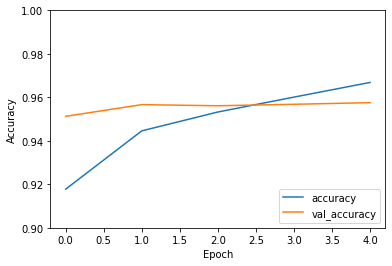

In [ ]:
# plot the change in the accuracy metric on the training and testing sets

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right');

---

6. Оцените качество обученной модели на тестовом наборе данных:
  * импортируйте содержимое файла `test.csv` в DataFrame;
  * получите числовые представления отзывов тестового набора, применив к обученному на обучающем наборе токенизатору метод `texts_to_sequences()`;
  * приведите числовые представления всех отзывов к одной длине с помощью функции `pad_sequences()`;
  * сформируйте набор меток классов `y_test`;
  * выполните оценку качества обученной модели на подготовленных тестовых данных.

In [ ]:
# evaluate the quality of the trained model on the test dataset

# import the contents of the test.csv file into a DataFrame
df_test = pd.read_csv('yelp_review_polarity_csv/test.csv', header=None, names=['label', 'text'])
y_test = df_test['label'].values - 1  # use labels 0 and 1 to label classes

# obtain numerical representations of test set reviews by applying the texts_to_sequences() method to the tokenizer trained on the training set
sequences_test = tokenizer.texts_to_sequences(df_test['text'].values)

# bring the numerical representations of all responses to the same length using the pad_sequences() function
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_test = pad_sequences(sequences_test, maxlen=max_len)

# evaluate the quality of the trained model on the prepared test data
model.evaluate(sequences_test, y_test)

1188/1188 [==============================] - 5s 4ms/step - loss: 0.1465 - accuracy: 0.9470


[0.14646407961845398, 0.9470263123512268]

---

7. Примените обученную модель для оценки тональности произвольного текста.

In [ ]:
# apply the trained model to evaluate the sentiment of arbitrary text

text = ['I love this movie. It\'s wonderful']
sequences = tokenizer.texts_to_sequences(text)
sequences = pad_sequences(sequences, maxlen=max_len)
print(text, model.predict(sequences)) # 1 means good review

text = ['I hate this movie. It\'s horrible']
sequences = tokenizer.texts_to_sequences(text)
sequences = pad_sequences(sequences, maxlen=max_len)
print(text, model.predict(sequences)) # 0 means bad review

1/1 [==============================] - 1s 912ms/step
["I love this movie. It's wonderful"] [[0.9995277]]
1/1 [==============================] - 0s 17ms/step
["I hate this movie. It's horrible"] [[0.00167523]]


---

9. Повторите действия из пп. 2 – 8 для `RNN` с архитектурой `GRU` (заменить слой `LSTM` на слой `GRU`).

In [ ]:
# repeat the steps from paragraphs. 2 - 8 for RNN with GRU architecture (replace LSTM layer with GRU layer)

from keras.layers import GRU

model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 665,025
Trainable params: 665,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3938/3938 [==============================] - 34s 8ms/step - loss: 0.2018 - accuracy: 0.9182 - val_loss: 0.1247 - val_accuracy: 0.9514
Epoch 2/5
3938/3938 [==============================] - 32s 8ms/step - loss: 0.1394 - accuracy: 0.9457 - val_loss: 0.1149 - val_accuracy: 0.9555
Epoch 3/5
3938/3938 [===

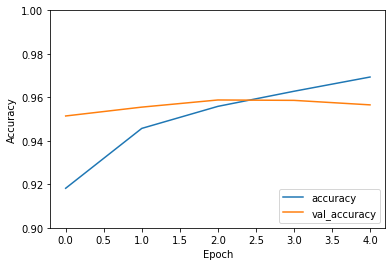

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right');

In [ ]:
model.evaluate(sequences_test, y_test)

text = ['I love this movie. It\'s wonderful']
sequences = tokenizer.texts_to_sequences(text)
sequences = pad_sequences(sequences, maxlen=max_len)
print(text, model.predict(sequences)) # 1 means good review

text = ['I hate this movie. It\'s horrible']
sequences = tokenizer.texts_to_sequences(text)
sequences = pad_sequences(sequences, maxlen=max_len)
print(text, model.predict(sequences)) # 0 means bad review

1/1 [==============================] - 0s 302ms/step
["I love this movie. It's wonderful"] [[0.9996933]]
1/1 [==============================] - 0s 15ms/step
["I hate this movie. It's horrible"] [[0.00219372]]
